# QoE Prediction 

Work on different datasets found online in order to be ready for our internship 

## Import requirements 

In [89]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn


In [90]:
#Importing the data
data_5g = pd.read_csv('Datasets/output_with_5g.csv')
data = pd.read_csv('Datasets/output.csv')

print(data_5g.head())
print(data.head())
print(data_5g.columns)
print(data.columns)
print(data_5g.info())
print(data.info())
print(data_5g.describe())
print(data.describe())

   Unnamed: 0   mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0           0  2.85       84726         1030        134      19            0
1           1  2.27       53510          540        122      21            0
2           2  2.91       75756         1920         80      16            0
3           3  2.10      131389          690        102      25         1000
4           4  2.24      337008         2230        133      15            0
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['Unnamed: 0', 'mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
Index(['mos', 'throughp

In [91]:
#merge the two datasets into one with no new columns
data_5g = data_5g.drop(columns=['Unnamed: 0'])

frames = [data, data_5g]
data = pd.concat(frames, axis=0, ignore_index=True)
print(data.head())
print(data.columns)
print(data.info())
print(data.describe())



    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss
0  1.96      238472          660        195      18         1000
1  1.80       70946          300        181      23            0
2  2.25      316053          460        176      14         1000
3  1.88      160097          290        152      24            0
4  3.51      204129          770        104      26            0
Index(['mos', 'throughput', 'avg_bitrate', 'delay_qos', 'jitter',
       'packet_loss'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42281 entries, 0 to 42280
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mos          42281 non-null  float64
 1   throughput   42281 non-null  int64  
 2   avg_bitrate  42281 non-null  int64  
 3   delay_qos    42281 non-null  int64  
 4   jitter       42281 non-null  int64  
 5   packet_loss  42281 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.9 MB
None


In [92]:
#Data cleaning 
for i in range(len(data)):
    if data['delay_qos'][i] == -1000 \
    or data['delay_qos'][i] == 0 or data['avg_bitrate'][i] == 0:
        data = data.drop([i])
        continue
    if data['jitter'][i] == 0:
        data['jitter'][i] = 1
    if data['jitter'][i] == -1000:
        data['jitter'][i] = 1


print (str(len(data)) + ' Data Loaded Successfully')

42281 Data Loaded Successfully


mos_class
Poor         17098
Fair         12130
Good          7697
Very Good     4279
Excellent     1077
Name: count, dtype: int64
['Fair' 'Poor' 'Good' 'Very Good' 'Excellent']
count     42281
unique        5
top        Poor
freq      17098
Name: mos_class, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 42281 entries, 0 to 42280
Series name: mos_class
Non-Null Count  Dtype 
--------------  ----- 
42281 non-null  object
dtypes: object(1)
memory usage: 330.4+ KB
None
    mos  throughput  avg_bitrate  delay_qos  jitter  packet_loss mos_class
0  1.96      238472          660        195      18         1000      Fair
1  1.80       70946          300        181      23            0      Poor
2  2.25      316053          460        176      14         1000      Fair
3  1.88      160097          290        152      24            0      Poor
4  3.51      204129          770        104      26            0      Good


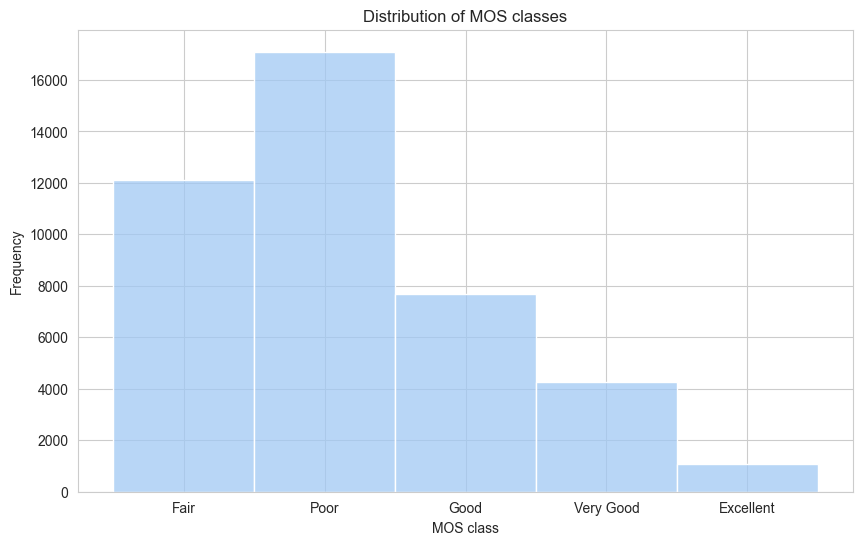

In [93]:
#Classification of the data 
# Poor for MOS between 1.0 and 1.9 
# Fair for MOS between 2.0 and 2.9
# Good for MOS between 3.0 and 3.9
# Very Good for MOS between 4.0 and 4.5
# Excellent for MOS between 4.6 and 5.0

def classify_mos(mos):
    if mos >= 1.0 and mos < 1.9:
        return 'Poor'
    elif mos >= 1.9 and mos < 2.9:
        return 'Fair'
    elif mos >= 2.9 and mos < 3.9:
        return 'Good'
    elif mos >= 3.9 and mos < 4.5:
        return 'Very Good'
    elif mos >= 4.5 and mos <= 5.0:
        return 'Excellent'
    else:
        return 'Unknown'
data['mos_class'] = data['mos'].apply(classify_mos)
print(data['mos_class'].value_counts())
print(data['mos_class'].unique())
print(data['mos_class'].describe())
print(data['mos_class'].info())
print(data.head())

#Data visualization
#Plotting the distribution of the MOS classes
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of MOS classes")
sns.histplot(data['mos_class'])
plt.xlabel("MOS class")
plt.ylabel("Frequency")
plt.show()



In [94]:
#Data exploration
print(data['mos'].describe())
print(data['mos'].isnull().sum())
print(data['avg_bitrate'].describe())
print(data['avg_bitrate'].isnull().sum())
print(data['delay_qos'].describe())
print(data['delay_qos'].isnull().sum())
print(data['jitter'].describe())
print(data['jitter'].isnull().sum())
print(data['packet_loss'].describe())
print(data['packet_loss'].isnull().sum())


count    42281.000000
mean         2.493025
std          0.927674
min          1.130000
25%          1.720000
50%          2.170000
75%          3.160000
max          4.800000
Name: mos, dtype: float64
0
count    42281.000000
mean      1680.057473
std       3867.820219
min         10.000000
25%        320.000000
50%        690.000000
75%       1430.000000
max      69900.000000
Name: avg_bitrate, dtype: float64
0
count    42281.000000
mean       202.232114
std        280.910438
min          1.000000
25%         83.000000
50%        131.000000
75%        184.000000
max       4468.000000
Name: delay_qos, dtype: float64
0
count    42281.000000
mean        33.005014
std         52.059103
min          1.000000
25%          8.000000
50%         17.000000
75%         35.000000
max        897.000000
Name: jitter, dtype: float64
0
count    42281.000000
mean       971.523852
std       1240.811781
min          0.000000
25%          0.000000
50%       1000.000000
75%       2000.000000
max       800

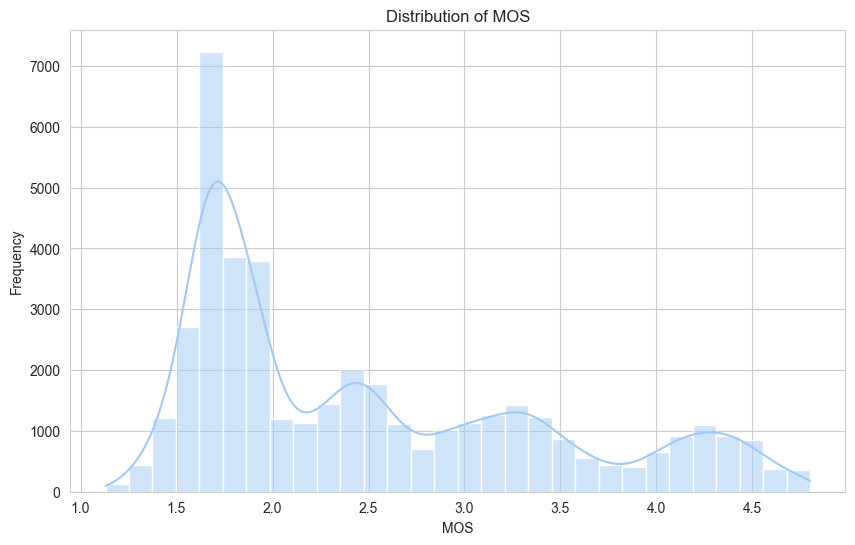

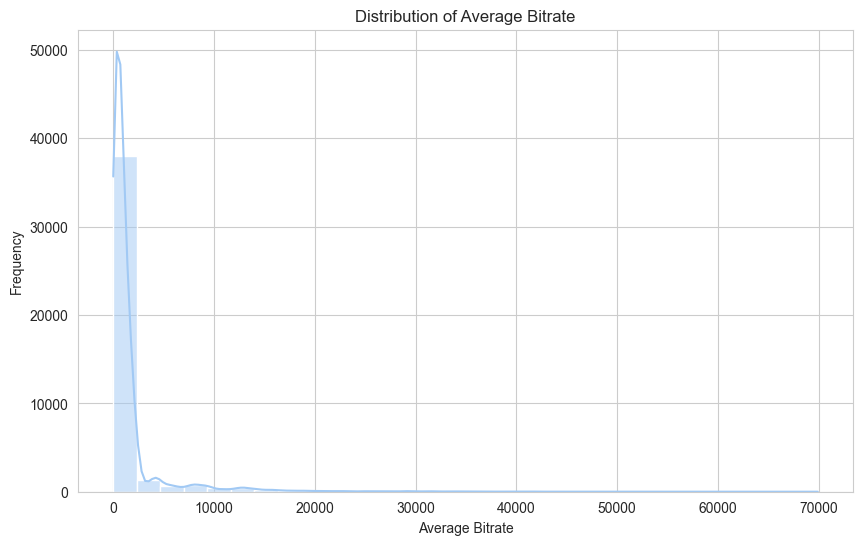

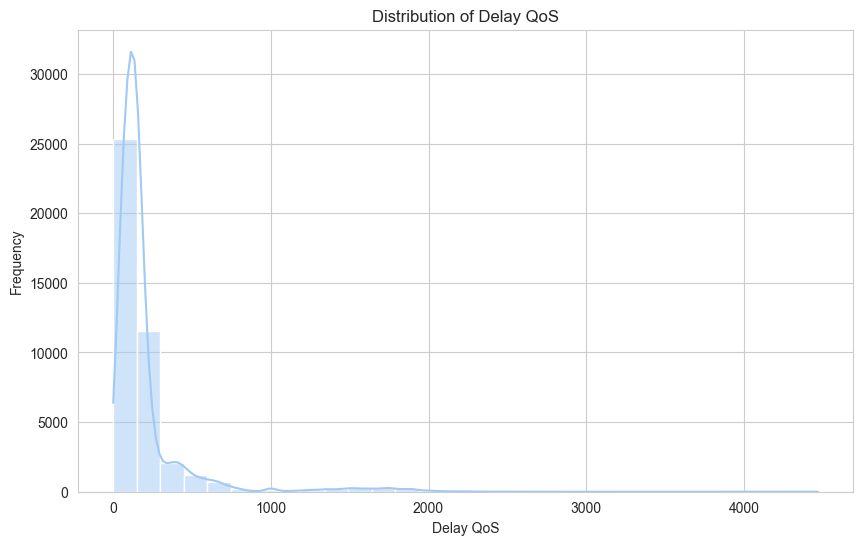

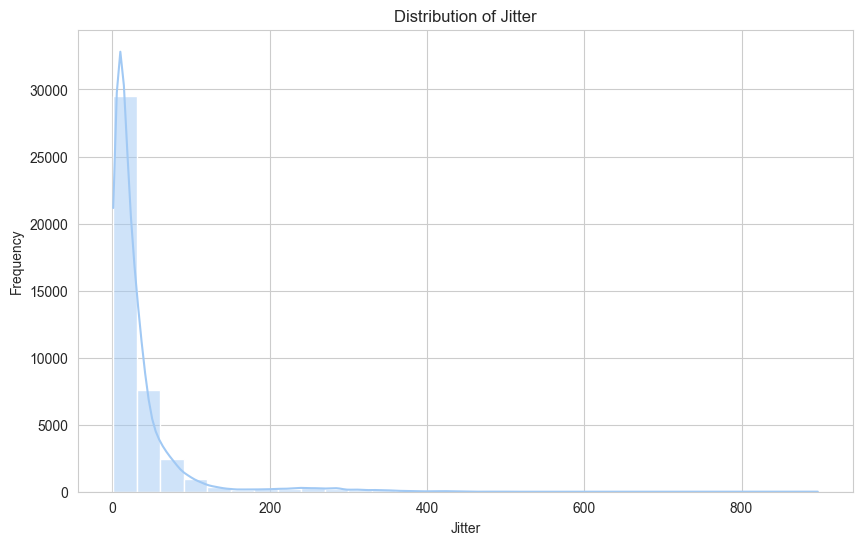

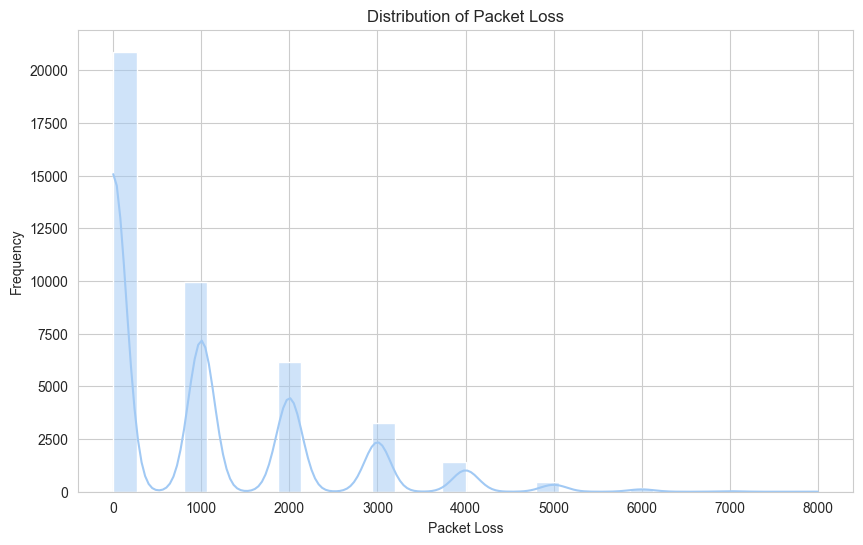

In [95]:
#Data visualization
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of MOS")
sns.histplot(data['mos'], kde=True, bins=30)
plt.xlabel("MOS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Average Bitrate")
sns.histplot(data['avg_bitrate'], kde=True, bins=30)
plt.xlabel("Average Bitrate")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Delay QoS")
sns.histplot(data['delay_qos'], kde=True, bins=30)
plt.xlabel("Delay QoS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Jitter")
sns.histplot(data['jitter'], kde=True, bins=30)
plt.xlabel("Jitter")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.title("Distribution of Packet Loss")
sns.histplot(data['packet_loss'], kde=True, bins=30)
plt.xlabel("Packet Loss")
plt.ylabel("Frequency")
plt.show()





<Axes: xlabel='avg_bitrate', ylabel='mos'>

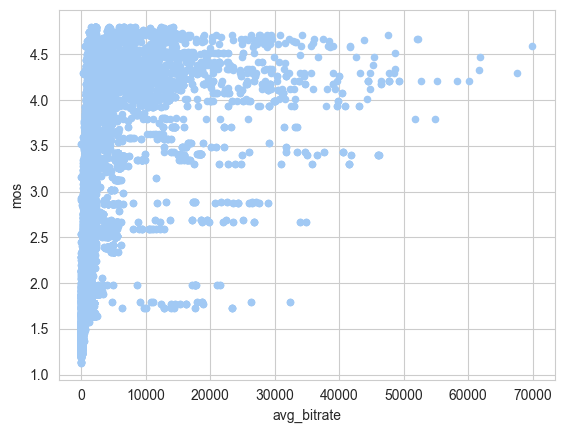

In [96]:
data.plot.scatter(x='avg_bitrate', y='mos')

<Axes: xlabel='delay_qos', ylabel='mos_class'>

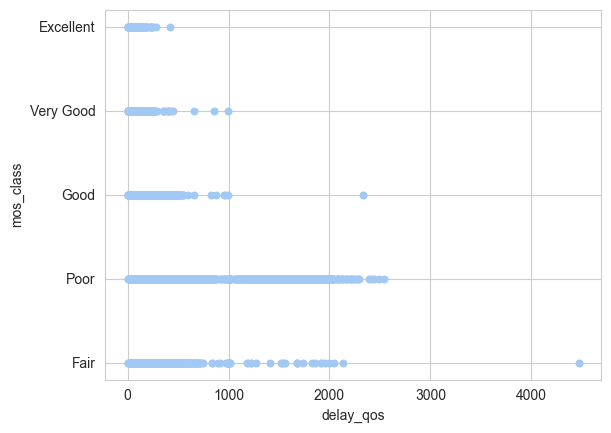

In [97]:
data.plot.scatter(x='delay_qos', y='mos_class')

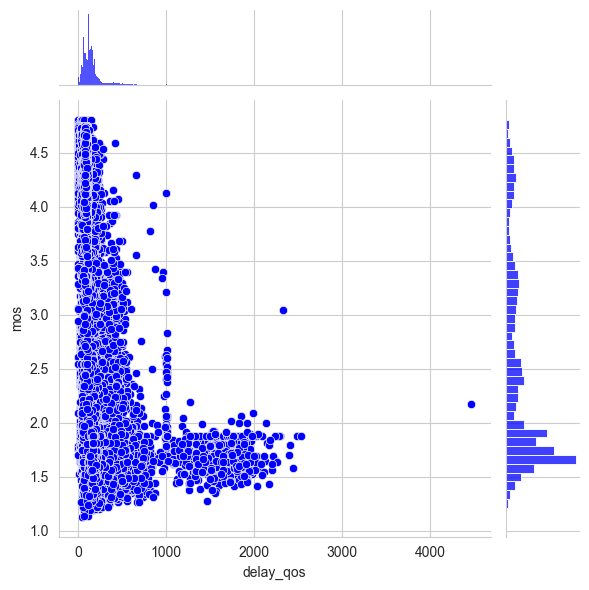

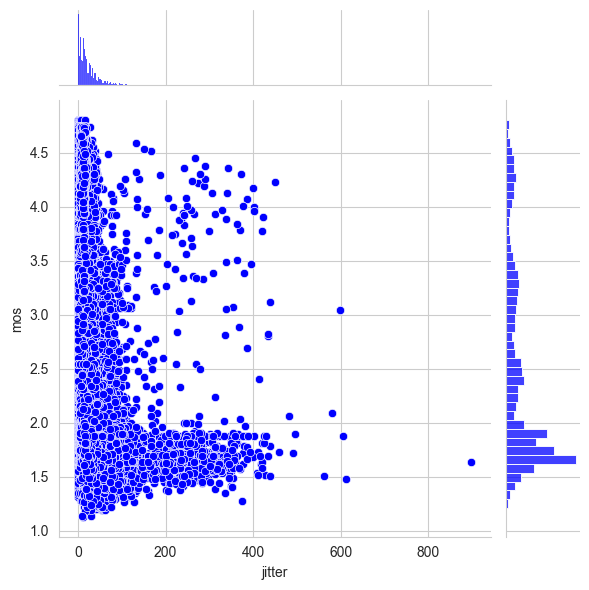

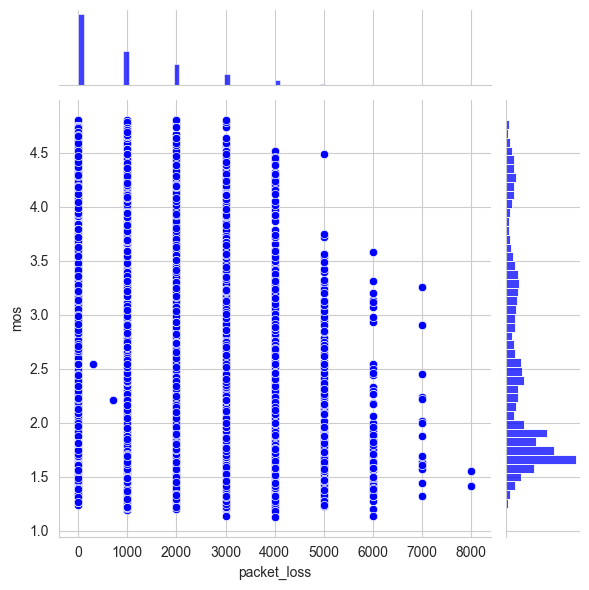

In [98]:
sns.jointplot(x='delay_qos', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='jitter', y='mos', data=data, kind='scatter', color='blue')
sns.jointplot(x='packet_loss', y='mos', data=data, kind='scatter', color='blue')


<Axes: xlabel='mos_class', ylabel='avg_bitrate'>

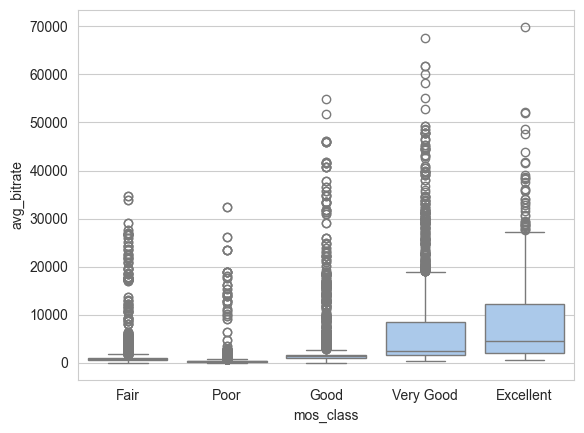

In [99]:
sns.boxplot(x='mos_class', y='avg_bitrate', data=data)


<Axes: xlabel='mos_class', ylabel='delay_qos'>

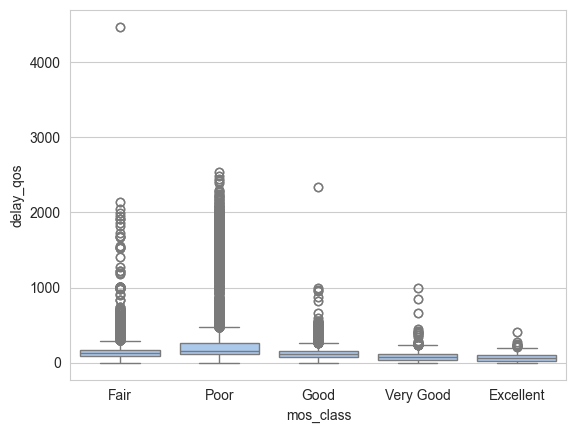

In [100]:
sns.boxplot(x='mos_class', y='delay_qos', data=data)


<Axes: xlabel='mos_class', ylabel='jitter'>

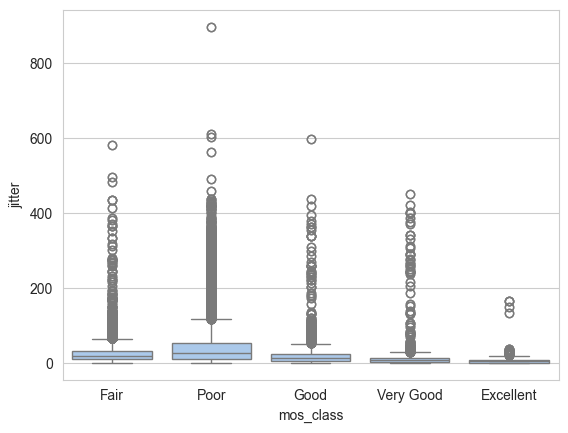

In [101]:
sns.boxplot(x='mos_class', y='jitter', data=data)


<Axes: xlabel='mos_class', ylabel='packet_loss'>

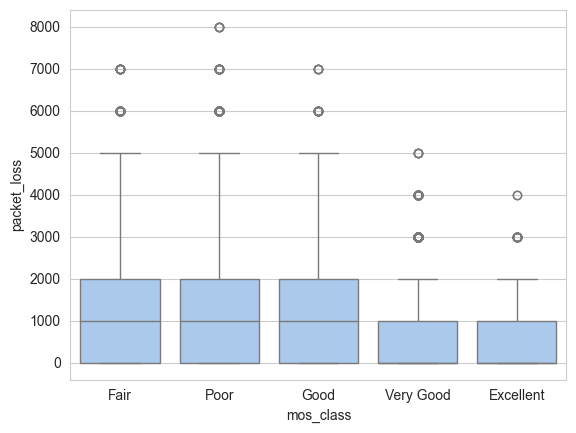

In [102]:
sns.boxplot(x='mos_class', y='packet_loss', data=data)

/var/folders/v_/s9924rt92rq7bt_0_y31thsw0000gn/T/ipykernel_25152/741340446.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x="mos_class", y="jitter", data=data, jitter=True, edgecolor="gray")


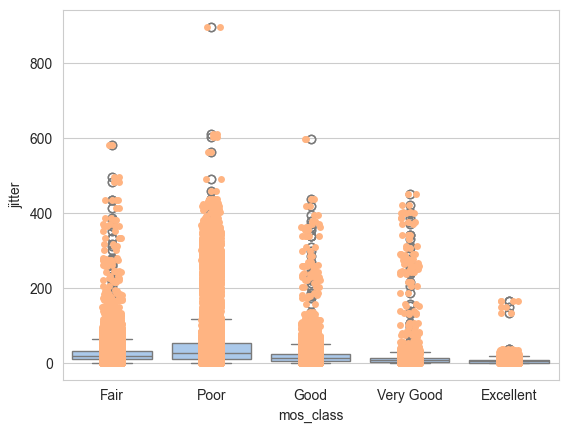

In [103]:
ax = sns.boxplot(x="mos_class", y="jitter", data=data)
ax = sns.stripplot(x="mos_class", y="jitter", data=data, jitter=True, edgecolor="gray")


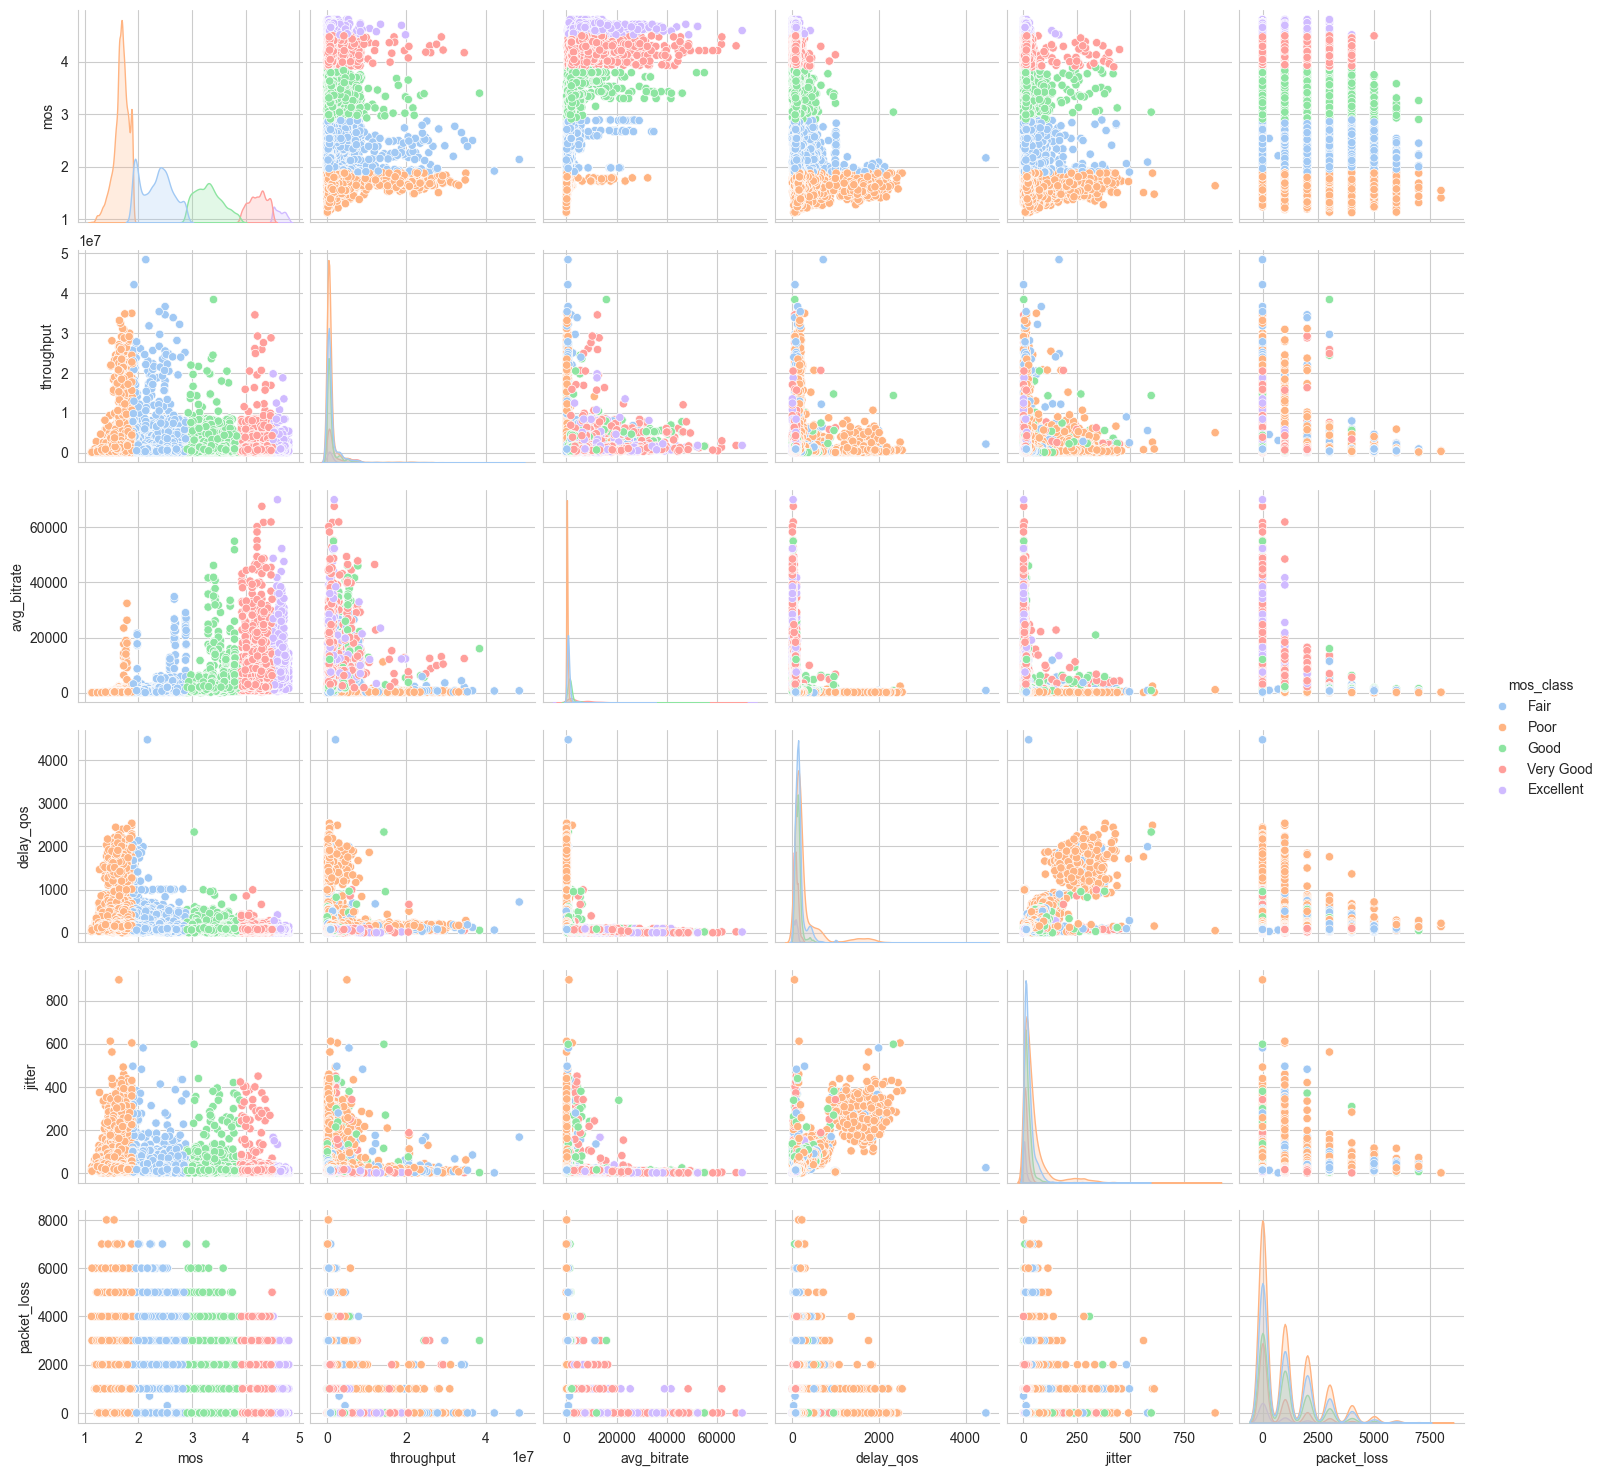

In [104]:
sns.pairplot(data, hue='mos_class', diag_kind='kde', palette='pastel')

<Axes: xlabel='mos_class', ylabel='avg_bitrate'>

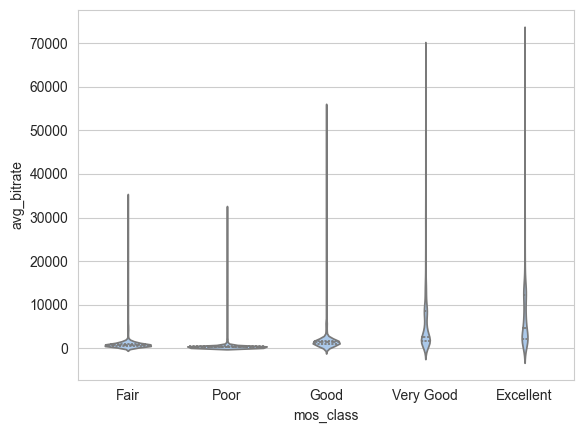

In [105]:
sns.violinplot(x='mos_class', y='avg_bitrate', data=data, inner='quartile')



<Axes: xlabel='mos_class', ylabel='delay_qos'>

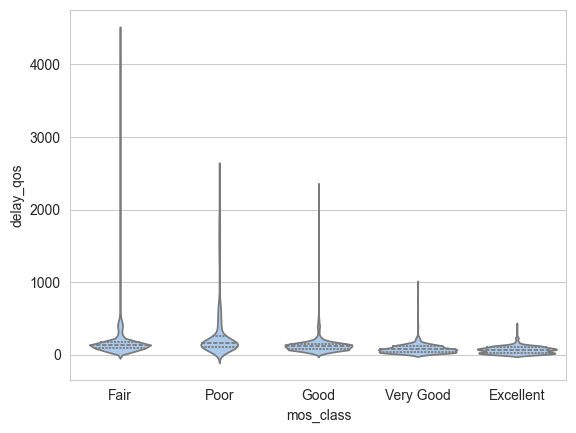

In [106]:
sns.violinplot(x='mos_class', y='delay_qos', data=data, inner='quartile')


<Axes: xlabel='mos_class', ylabel='jitter'>

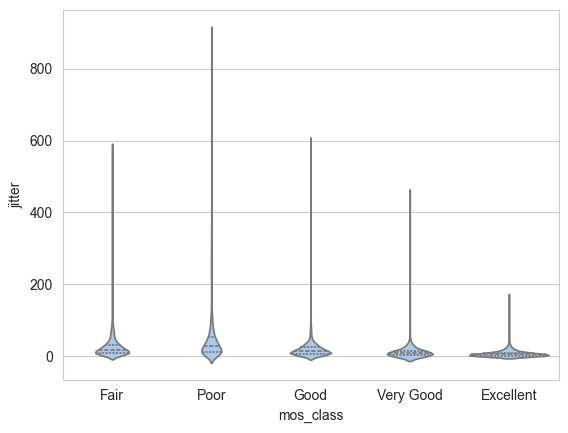

In [107]:
sns.violinplot(x='mos_class', y='jitter', data=data, inner='quartile')


<Axes: xlabel='mos_class', ylabel='packet_loss'>

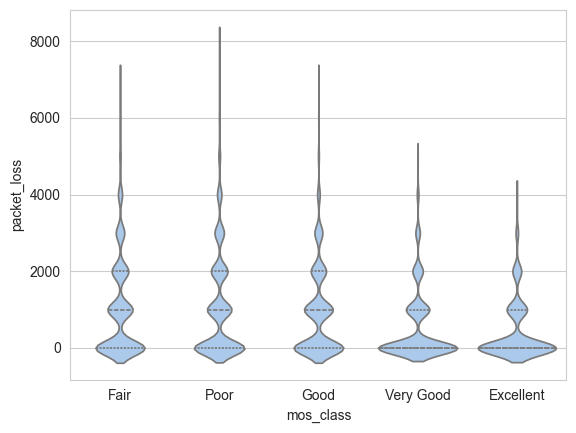

In [108]:
sns.violinplot(x='mos_class', y='packet_loss', data=data, inner='quartile')

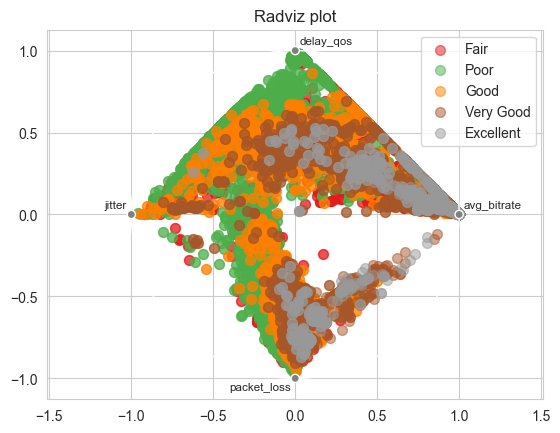

In [109]:
from pandas.plotting import radviz

# Correct usage of radviz with sample data except for the 'mos'
cols = ['avg_bitrate', 'delay_qos', 'jitter', 'packet_loss', 'mos_class']
radviz(data[cols], class_column='mos_class', colormap='Set1', s=50, alpha=0.5)
plt.title("Radviz plot")
plt.show()


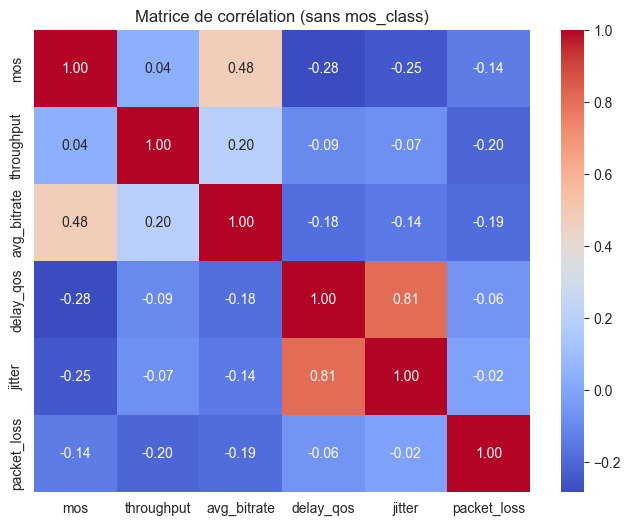

In [110]:
corr_matrix = data.drop(columns='mos_class').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (sans mos_class)")
plt.show()

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import normalize

Linear Regression Model:
Mean Absolute Error: 0.6436082796346537
Mean Squared Error: 0.6373913138087651
R-squared: 0.24811144625264325

Random Forest Model:
Mean Absolute Error: 0.1962043818307741
Mean Squared Error: 0.09385944416228073
R-squared: 0.8892801953873479


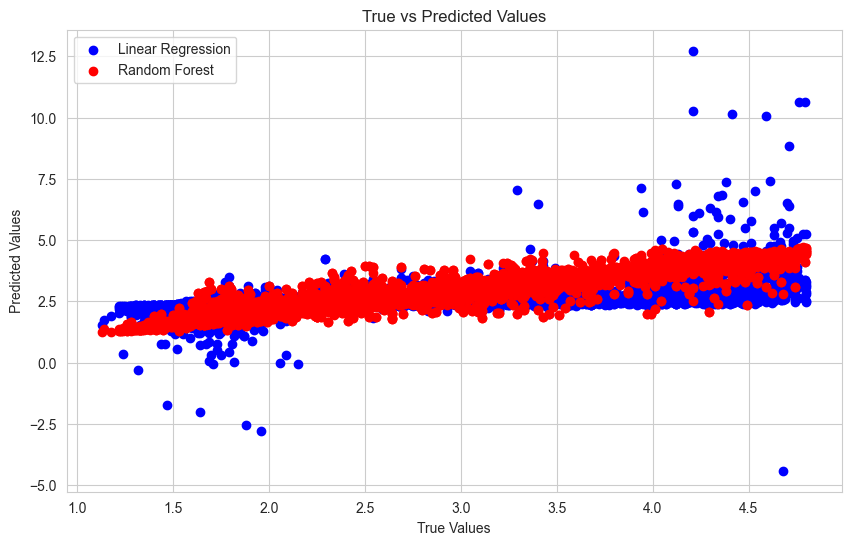

In [112]:
# Train model 
X = data.drop('mos', axis=1)

X = data[['delay_qos','avg_bitrate','jitter', 'throughput','packet_loss']] 
y = data['mos']

X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate the models
print("Linear Regression Model:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))
print("\nRandom Forest Model:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()




In [113]:
# Add more features: Derive new features like interactions (e.g. throughput * delay), polynomials, log transforms etc. More predictive features can reduce MSE.
data['delay_log'] = np.log(data['delay_qos']+1) 

data['bitrate_log'] = np.log(data['avg_bitrate']+1)

data['packet_loss_squared'] = data['packet_loss'] ** 2

data['throughput_jitter'] = data['throughput'] * data['jitter']

data['delay_jitter'] = data['delay_qos'] * data['jitter']

data['loss_rate'] =  data['avg_bitrate'] / (data['packet_loss'] + 1)

[0]	validation-rmse:0.91622
[1]	validation-rmse:0.91460
[2]	validation-rmse:0.90913
[3]	validation-rmse:0.90322
[4]	validation-rmse:0.90166
[5]	validation-rmse:0.89587
[6]	validation-rmse:0.89188
[7]	validation-rmse:0.88623
[8]	validation-rmse:0.88258
[9]	validation-rmse:0.87901
[10]	validation-rmse:0.87353
[11]	validation-rmse:0.86809
[12]	validation-rmse:0.86470
[13]	validation-rmse:0.86139
[14]	validation-rmse:0.85659
[15]	validation-rmse:0.85330
[16]	validation-rmse:0.84855
[17]	validation-rmse:0.84346
[18]	validation-rmse:0.83939
[19]	validation-rmse:0.83538
[20]	validation-rmse:0.83088
[21]	validation-rmse:0.82600
[22]	validation-rmse:0.82121
[23]	validation-rmse:0.81646
[24]	validation-rmse:0.81329
[25]	validation-rmse:0.81014
[26]	validation-rmse:0.80553
[27]	validation-rmse:0.80143
[28]	validation-rmse:0.80028
[29]	validation-rmse:0.79753
[30]	validation-rmse:0.79396
[31]	validation-rmse:0.79284
[32]	validation-rmse:0.78846
[33]	validation-rmse:0.78416
[34]	validation-rmse:0.7

/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:01:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[95]	validation-rmse:0.63721
[96]	validation-rmse:0.63512
[97]	validation-rmse:0.63462
[98]	validation-rmse:0.63258
[99]	validation-rmse:0.63115
[100]	validation-rmse:0.62990
[101]	validation-rmse:0.62943
[102]	validation-rmse:0.62786
[103]	validation-rmse:0.62632
[104]	validation-rmse:0.62440
[105]	validation-rmse:0.62250
[106]	validation-rmse:0.62102
[107]	validation-rmse:0.61912
[108]	validation-rmse:0.61729
[109]	validation-rmse:0.61551
[110]	validation-rmse:0.61508
[111]	validation-rmse:0.61372
[112]	validation-rmse:0.61237
[113]	validation-rmse:0.61116
[114]	validation-rmse:0.60989
[115]	validation-rmse:0.60869
[116]	validation-rmse:0.60743
[117]	validation-rmse:0.60604
[118]	validation-rmse:0.60440
[119]	validation-rmse:0.60282
[120]	validation-rmse:0.60118
[121]	validation-rmse:0.59962
[122]	validation-rmse:0.59926
[123]	validation-rmse:0.59800
[124]	validation-rmse:0.59675
[125]	validation-rmse:0.59562
[126]	validation-rmse:0.59527
[127]	validation-rmse:0.59385
[128]	validatio

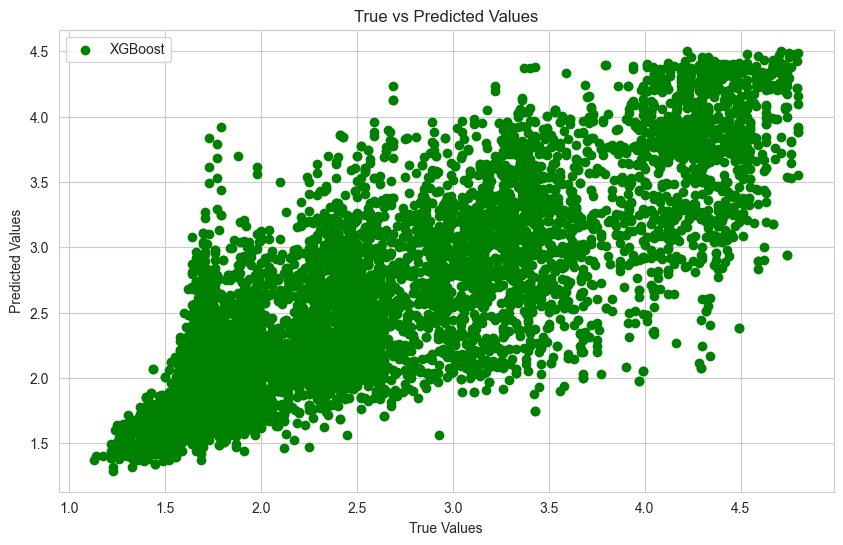

In [114]:
#train xgb model with old features 
import xgboost as xgb

# Train model
X = data.drop('mos', axis=1)
X = data[['delay_qos','avg_bitrate','jitter', 'throughput','packet_loss']]
y = data['mos']
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 6,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'n_estimators': 1000,
    'seed': 42
}

# train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=50, evals=[(dtest, 'validation')])

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Compute metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Model:")
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()




[0]	validation-rmse:0.91569
[1]	validation-rmse:0.91213
[2]	validation-rmse:0.90884
[3]	validation-rmse:0.90360
[4]	validation-rmse:0.89844
[5]	validation-rmse:0.89431
[6]	validation-rmse:0.88979
[7]	validation-rmse:0.88500
[8]	validation-rmse:0.88030
[9]	validation-rmse:0.87742
[10]	validation-rmse:0.87285
[11]	validation-rmse:0.86847
[12]	validation-rmse:0.86395
[13]	validation-rmse:0.85935
[14]	validation-rmse:0.85479
[15]	validation-rmse:0.85026
[16]	validation-rmse:0.84577
[17]	validation-rmse:0.84138
[18]	validation-rmse:0.83721
[19]	validation-rmse:0.83448
[20]	validation-rmse:0.83202
[21]	validation-rmse:0.82790
[22]	validation-rmse:0.82372
[23]	validation-rmse:0.81967
[24]	validation-rmse:0.81563
[25]	validation-rmse:0.81330
[26]	validation-rmse:0.80932
[27]	validation-rmse:0.80739
[28]	validation-rmse:0.80357
[29]	validation-rmse:0.79987
[30]	validation-rmse:0.79766
[31]	validation-rmse:0.79390
[32]	validation-rmse:0.79017
[33]	validation-rmse:0.78778
[34]	validation-rmse:0.7

/Users/zahimchared/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [16:03:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[86]	validation-rmse:0.66815
[87]	validation-rmse:0.66612
[88]	validation-rmse:0.66420
[89]	validation-rmse:0.66310
[90]	validation-rmse:0.66115
[91]	validation-rmse:0.65923
[92]	validation-rmse:0.65819
[93]	validation-rmse:0.65645
[94]	validation-rmse:0.65539
[95]	validation-rmse:0.65340
[96]	validation-rmse:0.65151
[97]	validation-rmse:0.64972
[98]	validation-rmse:0.64883
[99]	validation-rmse:0.64714
[100]	validation-rmse:0.64529
[101]	validation-rmse:0.64437
[102]	validation-rmse:0.64356
[103]	validation-rmse:0.64262
[104]	validation-rmse:0.64185
[105]	validation-rmse:0.64085
[106]	validation-rmse:0.64005
[107]	validation-rmse:0.63836
[108]	validation-rmse:0.63762
[109]	validation-rmse:0.63644
[110]	validation-rmse:0.63485
[111]	validation-rmse:0.63338
[112]	validation-rmse:0.63261
[113]	validation-rmse:0.63106
[114]	validation-rmse:0.62950
[115]	validation-rmse:0.62790
[116]	validation-rmse:0.62688
[117]	validation-rmse:0.62553
[118]	validation-rmse:0.62470
[119]	validation-rmse:0.

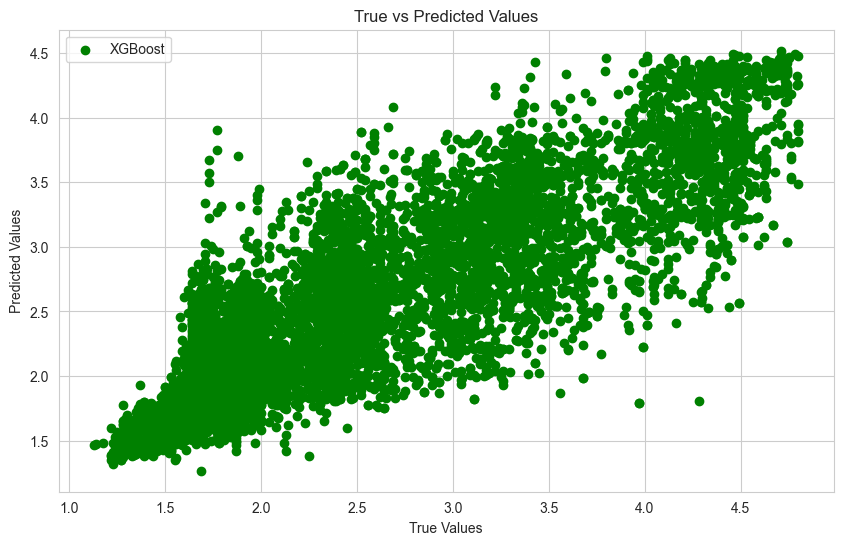

In [115]:
# Train xgb model with new features


# Train model
X = data.drop('mos', axis=1)
X = data[['delay_log', 'bitrate_log', 'packet_loss_squared', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
y = data['mos']
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert data to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# set parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.01,
    'max_depth': 6,
    'colsample_bytree': 0.7,
    'subsample': 0.7,
    'n_estimators': 1000,
    'seed': 42
}

# train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, early_stopping_rounds=50, evals=[(dtest, 'validation')])

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Compute metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print("XGBoost Model:")
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='green', label='XGBoost')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()





XGBoost Regressor Model:
Mean Absolute Error: 0.3340551736595304
Mean Squared Error: 0.21062822050675056
Root Mean Squared Error: 0.45894250239735973
R-squared: 0.7515357604281456


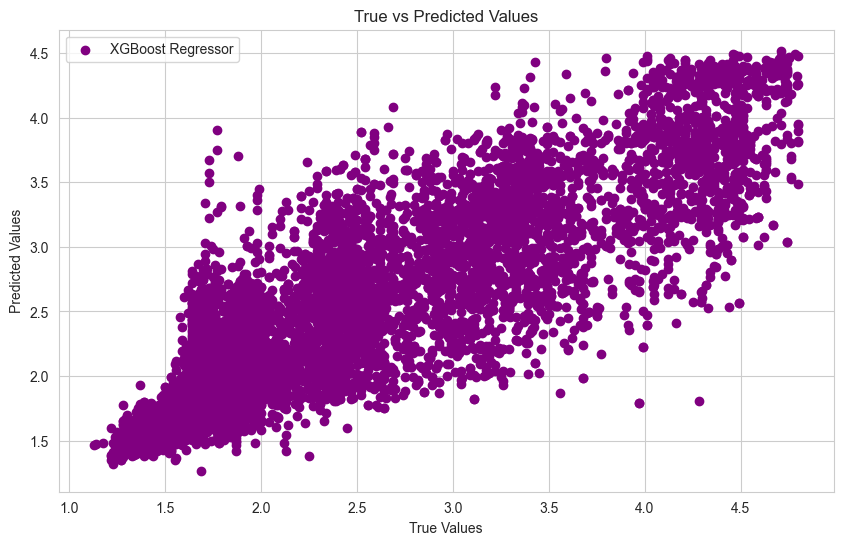

In [116]:
#Comparaison with XGBRegressor
from xgboost import XGBRegressor

# Train model
X = data.drop('mos', axis=1)
X = data[['delay_log', 'bitrate_log', 'packet_loss_squared', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
y = data['mos']
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_regressor = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', learning_rate=0.01, max_depth=6, colsample_bytree=0.7, subsample=0.7, n_estimators=1000, seed=42)
xgb_regressor.fit(X_train, y_train)
# Make predictions
y_pred_xgb_regressor = xgb_regressor.predict(X_test)
# Compute metrics
r2_xgb_regressor = r2_score(y_test, y_pred_xgb_regressor)
mse_xgb_regressor = mean_squared_error(y_test, y_pred_xgb_regressor)
rmse_xgb_regressor = np.sqrt(mse_xgb_regressor)
mae_xgb_regressor = mean_absolute_error(y_test, y_pred_xgb_regressor)
print("XGBoost Regressor Model:")
print("Mean Absolute Error:", mae_xgb_regressor)
print("Mean Squared Error:", mse_xgb_regressor)
print("Root Mean Squared Error:", rmse_xgb_regressor)
print("R-squared:", r2_xgb_regressor)
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb_regressor, color='purple', label='XGBoost Regressor')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


Gradient Boosting Regressor Model:
Mean Absolute Error: 0.5281735768763481
Mean Squared Error: 0.4494793013172879
Root Mean Squared Error: 0.6704321750313658
R-squared: 0.4697788713383302
0.4697788713383302


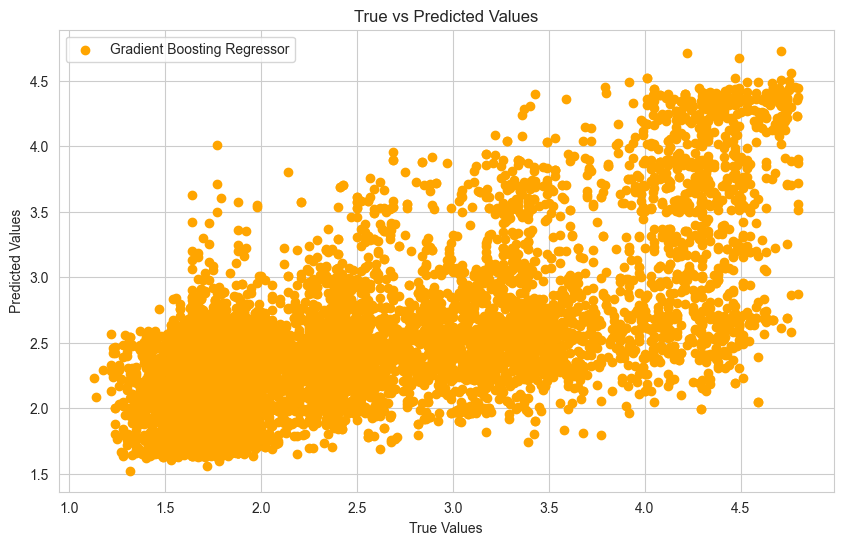

In [119]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Train model
X = data.drop('mos', axis=1)
X = data[['delay_log', 'bitrate_log', 'packet_loss_squared', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
y = data['mos']
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=6, random_state=42, loss='squared_error', criterion='friedman_mse')
gb_regressor.fit(X_train, y_train)
# Make predictions
y_pred_gb_regressor = gb_regressor.predict(X_test)
# Compute metrics
r2_gb_regressor = r2_score(y_test, y_pred_gb_regressor)
mse_gb_regressor = mean_squared_error(y_test, y_pred_gb_regressor)
rmse_gb_regressor = np.sqrt(mse_gb_regressor)
mae_gb_regressor = mean_absolute_error(y_test, y_pred_gb_regressor)
print("Gradient Boosting Regressor Model:")
print("Mean Absolute Error:", mae_gb_regressor)
print("Mean Squared Error:", mse_gb_regressor)
print("Root Mean Squared Error:", rmse_gb_regressor)
print("R-squared:", r2_gb_regressor)
print(gb_regressor.score(X_test, y_test))
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb_regressor, color='orange', label='Gradient Boosting Regressor')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()


HistGradient Boosting Regressor Model:
Mean Absolute Error: 0.3403448100316698
Mean Squared Error: 0.21942180961666066
Root Mean Squared Error: 0.4684248174645112
R-squared: 0.7411625425087021
0.7411625425087021


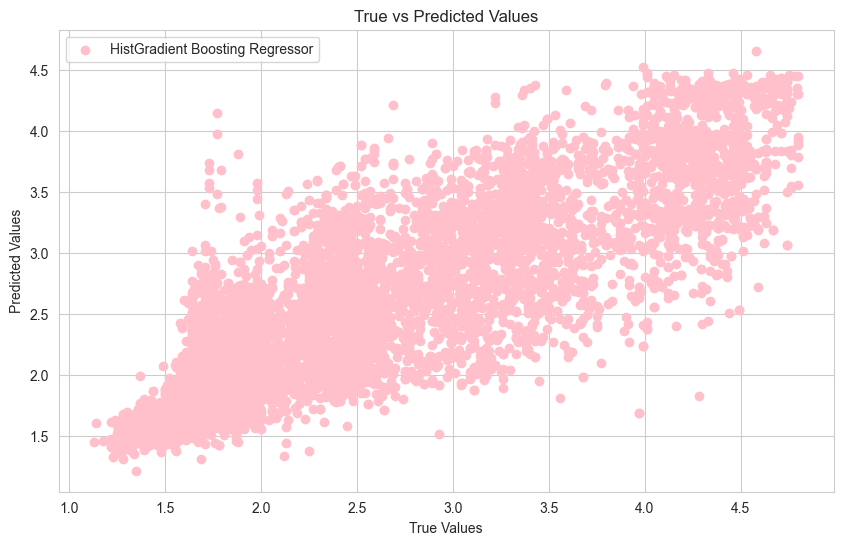

In [120]:
#HistGradient Boosting Regressor
from sklearn.ensemble import HistGradientBoostingRegressor

#Train model
X = data.drop('mos', axis=1)
X = data[['delay_log', 'bitrate_log', 'packet_loss_squared', 'throughput_jitter', 'delay_jitter', 'loss_rate']]
y = data['mos']
X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
hgb_regressor = HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.01, max_depth=6, loss='squared_error')
hgb_regressor.fit(X_train, y_train)
# Make predictions
y_pred_hgb_regressor = hgb_regressor.predict(X_test)
# Compute metrics
r2_hgb_regressor = r2_score(y_test, y_pred_hgb_regressor)
mse_hgb_regressor = mean_squared_error(y_test, y_pred_hgb_regressor)
rmse_hgb_regressor = np.sqrt(mse_hgb_regressor)
mae_hgb_regressor = mean_absolute_error(y_test, y_pred_hgb_regressor)
print("HistGradient Boosting Regressor Model:")
print("Mean Absolute Error:", mae_hgb_regressor)
print("Mean Squared Error:", mse_hgb_regressor)
print("Root Mean Squared Error:", rmse_hgb_regressor)
print("R-squared:", r2_hgb_regressor)
print(hgb_regressor.score(X_test, y_test))
# Plotting the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_hgb_regressor, color='pink', label='HistGradient Boosting Regressor')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()